In [1]:
import numpy as np

n_s = 30 # number of students
n_i = 20 # number of items

# pick a random ability for each student from an N(0,1) distribution

abilities = np.random.randn(n_s,1)

# pick a random difficulty for each item from an N(0,1) distribution

difficulties = np.random.randn(1,n_i)

# the IRT model says that P(correct[s,i]) = logistic(ability[s] -difficulty[i])

def logistic(a):
    return 1./(1+np.exp(-a))
prob_correct = logistic(abilities - difficulties) 

print (abilities.shape, difficulties.shape, prob_correct.shape)

# flip a coin to pick 'correct' or 'incorrect' for each student based on the
# probability of a correct response

student_responses = np.random.binomial(1,prob_correct)
print (student_responses)



(5, 1) (1, 5) (5, 5)
[[0 0 1 0 0]
 [0 0 0 0 0]
 [1 0 1 0 0]
 [1 1 0 1 0]
 [1 1 0 1 1]]


In [2]:
import irt

# This is the part where the student ability and the item difficulty is being trained
# This estimation uses the four paremeter model
thetas, abcds = irt.estimate_thetas(student_responses)

# This is where we restore the responses with the obtained parameters
prob_correct = irt.four_parameter_model(abcds[:,0], abcds[:,1], abcds[:,2], abcds[:,3], thetas)

prediction = np.random.binomial(1,prob_correct)

print(prediction)

[[0 0 1 1 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [1 1 0 1 1]
 [0 1 1 0 1]]


In [3]:
# This is where we test the restored responses again
total_number_of_responses = n_s * n_i
correct = 0
for s in range(n_s):
    for i in range(n_i):
        if student_responses[s][i] == prediction[s][i]:
            correct += 1
print("The accuracy for the synthesis data is :", correct/total_number_of_responses)

The accuracy for the synthesis data is : 0.64


## Spearman correlation of the parameters

In [4]:
from scipy.stats import spearmanr

print("The spearman correlation of the true abilities and the model estimation\n")

correlation, p_value = spearmanr(abilities,thetas)
print("The correlation is : ", round(correlation,2)," The p_value is : ", round(p_value,2))
print()
print("The spearman correlation of the true item difficulty and the model estimation\n")

correlation, p_value = spearmanr(difficulties.flatten(),-abcds[:,1])
print("The correlation is : ", round(correlation,2)," The p_value is : ", round(p_value,2))

The spearman correlation of the true abilities and the model estimation

The correlation is :  1.0  The p_value is :  0.0

The spearman correlation of the true item difficulty and the model estimation

The correlation is :  0.1  The p_value is :  0.87


## Pearson correlation of the parameters

In [5]:
from scipy.stats import pearsonr

print("The pearson correlation of the true abilities and the model esitmation\n")

pearsonr(abilities.flatten(), thetas.flatten())

correlation, p_value = pearsonr(abilities.flatten(), thetas.flatten())
print("The correlation is : ", round(correlation,2)," The p_value is : ", round(p_value,2))
print()
print("The spearman correlation of the true item difficulty and the model estimation\n")

correlation, p_value = pearsonr(difficulties.flatten(),-abcds[:,1])
print("The correlation is : ", round(correlation,2)," The p_value is : ", round(p_value,2))

The pearson correlation of the true abilities and the model esitmation

The correlation is :  0.83  The p_value is :  0.08

The spearman correlation of the true item difficulty and the model estimation

The correlation is :  0.32  The p_value is :  0.6


## Visualize

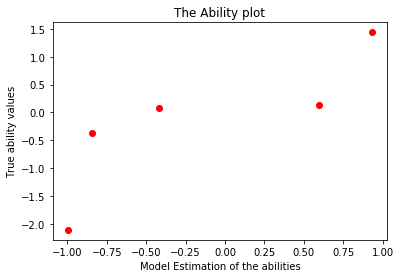

In [6]:
import matplotlib.pyplot as plt
plt.title('The Ability plot')
plt.xlabel('Model Estimation of the abilities')
plt.ylabel('True ability values')
plt.plot(thetas.flatten(), abilities.flatten(),'ro')
plt.savefig('The Ability Recovery with 100 students.png')

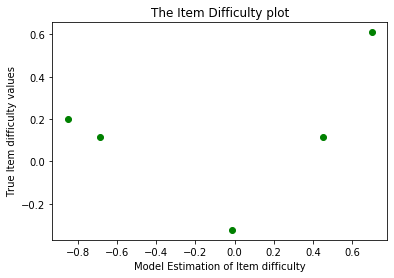

In [7]:
plt.title('The Item Difficulty plot')
plt.xlabel('Model Estimation of Item difficulty')
plt.ylabel('True Item difficulty values')
plt.plot(difficulties.flatten(),-abcds[:,1], 'go')
plt.savefig('the_accuracy_plot.png')
plt.savefig('The Item Difficutly Recovery with 100 items.png')